# 4. Refine Model

## Scripts

In [3]:
#https://github.com/halpert3/complaint-content-classification-nlp/blob/main/notebooks/scoring_functions/scoring_functions.py
#courtesy of github user halpert3

import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    score_train_and_test(y_train, train_y_pred, y_test, test_y_pred)
    disp_conf_matrix(y_train, train_y_pred, y_test, test_y_pred)


def score_train_and_test(y_train, train_y_pred, y_test, test_y_pred):

    # Training Scores
    training_accuracy = accuracy_score(y_train, train_y_pred)
    training_precision = precision_score(y_train, train_y_pred, average='macro')
    training_recall = recall_score(y_train, train_y_pred, average='macro')
    training_f1 = f1_score(y_train, train_y_pred, average='macro')
    
    print("TRAINING - Classification Report")
    print("Accuracy: {:.1%}".format(training_accuracy))
    print("Precision: {:.1%}".format(training_precision))
    print("Recall: {:.1%}".format(training_recall))
    print("F1: {:.1%}".format(training_f1))
    print(classification_report(y_train, train_y_pred))
    
    # Testing Scores
    testing_accuracy = accuracy_score(y_test, test_y_pred)
    testing_precision = precision_score(y_test, test_y_pred, average='macro')
    testing_recall = recall_score(y_test, test_y_pred, average='macro')
    testing_f1 = f1_score(y_test, test_y_pred, average='macro')
    
    print("TESTING - Classification Report")
    print("Accuracy: {:.1%}".format(testing_accuracy))
    print("Precision: {:.1%}".format(testing_precision))
    print("Recall: {:.1%}".format(testing_recall))
    print("F1: {:.1%}".format(testing_f1))
    print(classification_report(y_test, test_y_pred))
    

def disp_conf_matrix(y_train, train_y_pred, y_test, test_y_pred):
    cm_train = confusion_matrix(y_train, train_y_pred, labels=[0,1,2,3,4])
    cm_test = confusion_matrix(y_test, test_y_pred, labels=[0,1,2,3,4])
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    
    # plotting two side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].set_title('Training confusion matrix'.upper(), fontsize = 12)
    axes[1].set_title('Testing confusion matrix'.upper(), fontsize = 12)
    disp1.plot(ax=axes[0])
    disp2.plot(ax=axes[1])

def scoring(y_real, y_pred, model, X_data): # change y_test to y_real
    # Calculates and prints scores for the model
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')

    print("Accuracy: {:.1%}".format(accuracy))
    print("Precision: {:.1%}".format(precision))
    print("Recall: {:.1%}".format(recall))
    print("F1: {:.1%}".format(f1))

    print('\n')
    print("Classification Report")
    print('\n')
    print(classification_report(y_real, y_pred))
    # Plots a confusion matrix graphic (defined below)
    plot = plot_c_matrix(model, X_data, y_real)


#### Functions from earlier project #### 

# note that plot_confustion_matrix needs to rerun the model. That's what you pass in the model again. 
def plot_c_matrix(model, X_test, y_real):
    # Generates a confusion matrix graphic
    plot_confusion_matrix(model, X_test, y_real)
    plt.grid(False)
    plt.show()

def add_scores_to_scoring_df(model_name, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train):
    
    # Adds scores to a dataframe for easy comparison
    model_scores = pd.read_csv('../data/model_scores.csv', index_col=0)
    test_accuracy = round(accuracy_score(y_test, predictions_from_X_test) * 100, 1)
    test_precision = round(precision_score(y_test, predictions_from_X_test, zero_division=0) * 100, 1)
    test_recall = round(recall_score(y_test, predictions_from_X_test, zero_division=0) * 100, 1)
    test_f1 = round(f1_score(y_test, predictions_from_X_test) * 100, 1)

    train_accuracy = round(accuracy_score(y_train_balanced, predictions_from_X_train) * 100, 1)
    train_precision = round(precision_score(y_train_balanced, predictions_from_X_train, zero_division=0) * 100, 1)
    train_recall = round(recall_score(y_train_balanced, predictions_from_X_train, zero_division=0) * 100, 1)
    train_f1 = round(f1_score(y_train_balanced, predictions_from_X_train) * 100, 1)
    
    scores = {'model': model_name,
          'test_accuracy': test_accuracy,
          'test_precision': test_precision,
          'test_recall': test_recall,
          'test_f1': test_f1, 'train_accuracy': train_accuracy, 
          'train_precision': train_precision, 
          'train_recall': train_recall,
          'train_f1': train_f1}
    
    model_scores = model_scores.append(scores, ignore_index=True)
    model_scores.drop_duplicates(keep="last", inplace=True)
    model_scores.to_csv('../data/model_scores.csv')
    pass
 
def add_scores_to_df(model_name, df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train):
    # Adds scores to a dataframe for easy comparison

    model_scores = df
 
    test_accuracy = round(accuracy_score(y_test, predictions_from_X_test) * 100, 3)
    test_precision = round(precision_score(y_test, predictions_from_X_test, zero_division=0) * 100, 3)
    test_recall = round(recall_score(y_test, predictions_from_X_test, zero_division=0) * 100, 3)
    test_f1 = round(f1_score(y_test, predictions_from_X_test) * 100, 3)

    train_accuracy = round(accuracy_score(y_train_balanced, predictions_from_X_train) * 100, 3)
    train_precision = round(precision_score(y_train_balanced, predictions_from_X_train, zero_division=0) * 100, 3)
    train_recall = round(recall_score(y_train_balanced, predictions_from_X_train, zero_division=0) * 100, 3)
    train_f1 = round(f1_score(y_train_balanced, predictions_from_X_train) * 100, 3)
    
    scores = {'model': model_name,
          'test_accuracy': test_accuracy,
          'test_precision': test_precision,
          'test_recall': test_recall,
          'test_f1': test_f1, 'train_accuracy': train_accuracy, 
          'train_precision': train_precision, 
          'train_recall': train_recall,
          'train_f1': train_f1}
    df_temp = pd.DataFrame.from_records(scores, index=[0])
#     columns = ['model', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 'train_precision', 'train_recall']

    new_df = pd.concat([model_scores, df_temp], sort=False)
#     model_scores = model_scores.append(scores, ignore_index=True)
#     model_scores.drop_duplicates(keep="last", inplace=True)
    new_df = new_df[['model', 'train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall', 'test_recall', 'train_f1', 'test_f1']]
    new_df.set_index('model')
    return new_df

## 1. Import packages

In [7]:
#pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 4.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import scoring_functions as f

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline

import importlib

import time
import matplotlib.pyplot as plt

In [9]:
# read datafile
df = pd.read_csv('../data/project_data/descriptions_processed.csv')

# clean up by removing NaN's, etc.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.dropna()
df.drop(df.loc[df['description'] == 'name'].index, inplace=True)

# replace class names with integers
role_dict ={'administrator': 0, 'analyst': 1, 'architect': 2, 
               'developer': 3, 'director': 4, 'engineer':5, 'leadership':6, 'manager':7, 'specialist':8}
df['role'].replace(role_dict, inplace=True)

df.shape

(453, 3)

## 2. Train Test/Split

In [10]:
X = df.drop(['role'], axis=1)
y = df['role']

X_train, X_test, y_train, y_test = train_test_split(X['description'], y, test_size=0.20, random_state=200)

## 3. Decision Tree Modeling

### 3a. Pipe 1 - Limit TF-IDF using max depth

In [48]:
dt1_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])
dt1_param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'tfidf__max_features': [400, 800, 1200, 1600], 
    'dt__max_depth': [4, 6, 8, 10]
}
dt1_grid_search = GridSearchCV(estimator=dt1_pipeline,
                               param_grid=dt1_param_grid,
                               scoring='recall_macro',
                               cv=3)
dt1_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid={'dt__max_depth': [4, 6, 8, 10],
                         'tfidf__max_features': [400, 800, 1200, 1600],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='recall_macro')

In [51]:
dt1_grid_search.best_params_

{'dt__max_depth': 10, 'tfidf__max_features': 800, 'tfidf__ngram_range': (1, 1)}

In [52]:
dt1_grid_search.best_score_

0.42507448201892645

### 3b. Pipe 2 - CountVector compared to TF-IDF

In [53]:
dt2_pipeline = Pipeline([('countv', CountVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])

dt2_param_grid = {
    'countv__ngram_range': [(1,1), (1,2)],
    'countv__max_features': [500, 1000, 2500, 4000], 
    'dt__max_depth': [4, 6, 8]
}

dt2_grid_search = GridSearchCV(estimator=dt2_pipeline,
                               param_grid=dt2_param_grid,
                               scoring='recall_macro',
                               cv=3)
dt2_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(dt2_grid_search.best_score_, 3)}')
dt2_grid_search.best_params_

Best Score: 0.377


{'countv__max_features': 4000,
 'countv__ngram_range': (1, 1),
 'dt__max_depth': 6}

### 3c. Pipe 3 - TFIDF max features

In [72]:
dt3_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])

dt3_param_grid = {
    'tfidf__max_features': [500, 800, 1100, 1400], 
    'dt__max_depth': [10]
}

dt3_grid_search = GridSearchCV(estimator=dt3_pipeline,
                               param_grid=dt3_param_grid,
                               scoring='recall_macro',
                               cv=3)
dt3_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(dt3_grid_search.best_score_, 3)}')
dt3_grid_search.best_params_

Best Score: 0.425


{'dt__max_depth': 10, 'tfidf__max_features': 800}

### 3d. Pipe 4 - TDIDF optimized max features

In [55]:
dt4_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=800, max_df=.7)), 
                         ('dt', DecisionTreeClassifier(random_state=123))])

dt4_param_grid = {
    'dt__max_depth': [6, 10, 14],    
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 3, 5]}

dt4_grid_search = GridSearchCV(estimator=dt4_pipeline,
                               param_grid=dt4_param_grid,
                               scoring='recall_macro',
                               cv=3)
dt4_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(dt4_grid_search.best_score_, 4)}')
dt4_grid_search.best_params_

Best Score: 0.4636


{'dt__max_depth': 14, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}

### 3e. Decision Tree - Best model

TRAINING - Classification Report
Accuracy: 92.8%
Precision: 89.5%
Recall: 88.7%
F1: 88.7%
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.96      0.99      0.97        72
           2       0.67      0.88      0.76        16
           3       0.83      0.92      0.87        37
           4       1.00      0.97      0.99        35
           5       0.99      0.97      0.98       110
           6       0.87      0.81      0.84        16
           7       0.93      0.85      0.89        46
           8       1.00      0.79      0.88        14

    accuracy                           0.93       362
   macro avg       0.89      0.89      0.89       362
weighted avg       0.93      0.93      0.93       362

TESTING - Classification Report
Accuracy: 53.8%
Precision: 37.1%
Recall: 37.8%
F1: 36.4%
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
       

/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/Python/3.8/lib/python/sit

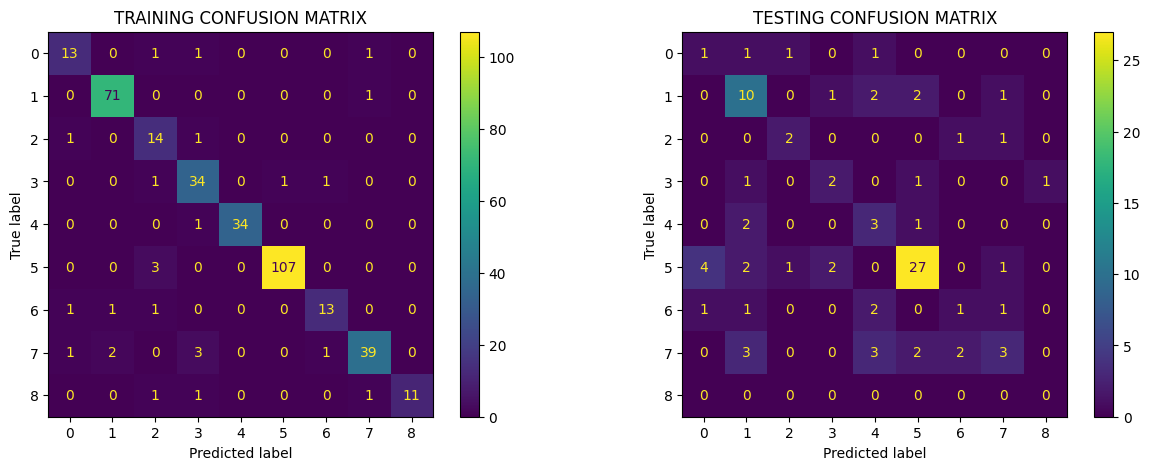

In [58]:
# Vectorize X train and test data
vectorizer_dt_best = TfidfVectorizer(max_features=800)
vect_X_train = vectorizer_dt_best.fit_transform(X_train)
vect_X_test = vectorizer_dt_best.transform(X_test)
feature_names =  vectorizer_dt_best.get_feature_names_out()
# Instantiate model
dt_best = DecisionTreeClassifier(
    random_state=123,
    max_depth=14,
    min_samples_leaf=1,
    min_samples_split=5)
imp.reload(f)
f.run_model(dt_best, vect_X_train, y_train, vect_X_test, y_test)

## 4. Naive Bayes Modeling

### 4a. Pipe 1 - TFIDF limiting and smoothing

In [62]:
nb1_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('nb', MultinomialNB())])
nb1_param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [500, 1000, 2500]
}
nb1_grid_search = GridSearchCV(estimator=nb1_pipeline,
                               param_grid=nb1_param_grid,
                               scoring='recall_macro',
                               cv=3)
nb1_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tfidf__max_features': [500, 1000, 2500],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='recall_macro')

In [63]:
nb1_grid_search.best_params_

{'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 2)}

In [64]:
round(nb1_grid_search.best_score_, 3)

0.189

### 4b. Pipe 2

In [67]:
nb2_pipeline = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))), 
                         ('nb', MultinomialNB())])
nb2_param_grid = {
    'tfidf__max_features': [2500, 4000, 5500],
    'nb__alpha': [.7, 1.3]
}
nb2_grid_search = GridSearchCV(estimator=nb2_pipeline,
                               param_grid=nb2_param_grid,
                               scoring='recall_macro',
                               cv=3)
nb2_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.7, 1.3],
                         'tfidf__max_features': [2500, 4000, 5500]},
             scoring='recall_macro')

In [68]:
print(f'Best Score: {round(nb2_grid_search.best_score_, 4)}')
nb2_grid_search.best_params_

Best Score: 0.1439


{'nb__alpha': 0.7, 'tfidf__max_features': 2500}

### 4c. Pipe 3 - Count Vector

In [74]:
nb3_pipeline = Pipeline([('countv', CountVectorizer()), 
                         ('nb', MultinomialNB())])

nb3_param_grid = {
    'countv__ngram_range': [(1,1), (1,2)],
    'countv__max_features': [1000, 2500, 4000], 
    'nb__alpha': [0.7, 1]
}

nb3_grid_search = GridSearchCV(estimator=nb3_pipeline,
                               param_grid=nb3_param_grid,
                               scoring='recall_macro',
                               cv=3)
nb3_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(nb3_grid_search.best_score_, 4)}')
nb3_grid_search.best_params_

Best Score: 0.3628


{'countv__max_features': 1000, 'countv__ngram_range': (1, 2), 'nb__alpha': 0.7}

### 4d. Pipe 4 - Smote

In [79]:
from imblearn.pipeline import Pipeline as imblearnPipeline

nb4_pipeline = imblearnPipeline([('countv', CountVectorizer(ngram_range=(1,2))),
                                 ('sampling', SMOTE()),
                                 ('nb', MultinomialNB())])

nb4_param_grid = {
    'countv__max_features': [400, 550, 700], 
    'nb__alpha': [0.55, 0.7, 0.9]
}

nb4_grid_search = GridSearchCV(estimator=nb4_pipeline,
                               param_grid=nb4_param_grid,
                               scoring='recall_macro',
                               cv=3)
nb4_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(nb4_grid_search.best_score_, 4)}')
nb4_grid_search.best_params_


Best Score: 0.3594


{'countv__max_features': 550, 'nb__alpha': 0.9}

### 4e. Best Model

TRAINING - Classification Report
Accuracy: 98.6%
Precision: 98.7%
Recall: 98.4%
F1: 98.5%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        72
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        37
           4       1.00      0.97      0.99        35
           5       0.98      0.99      0.99       110
           6       0.94      1.00      0.97        16
           7       0.96      0.96      0.96        46
           8       1.00      1.00      1.00        14

    accuracy                           0.99       362
   macro avg       0.99      0.98      0.99       362
weighted avg       0.99      0.99      0.99       362

TESTING - Classification Report
Accuracy: 44.0%
Precision: 21.8%
Recall: 19.3%
F1: 17.9%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
       

/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenmye/Library/P

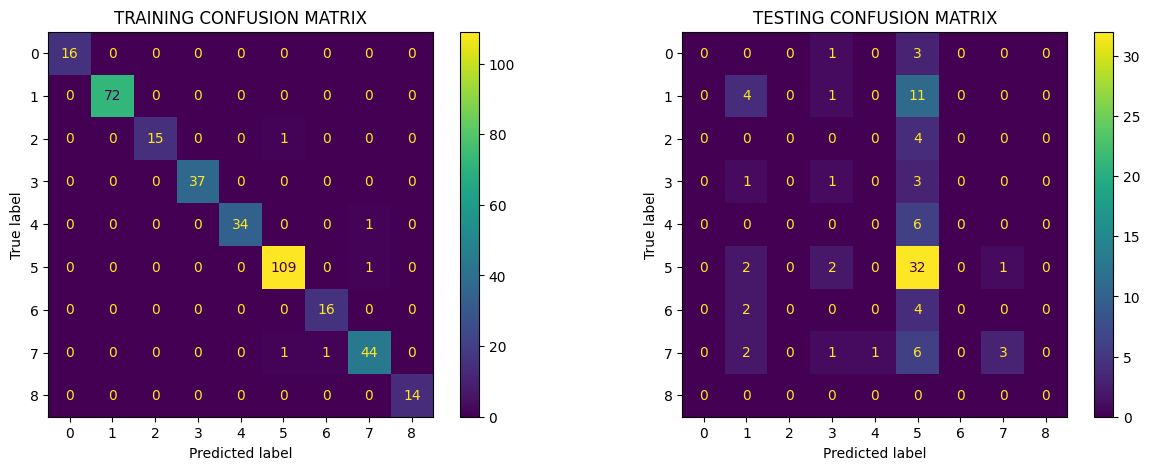

In [80]:
# Vectorize X train and test data
vectorizer_nb_best = CountVectorizer(ngram_range=(1,2), max_features=70000)
vect_X_train = vectorizer_nb_best.fit_transform(X_train)
vect_X_test = vectorizer_nb_best.transform(X_test)
feature_names = vectorizer_nb_best.get_feature_names_out()
# Instantiate model
nb_best = MultinomialNB(alpha=0.45)
f.run_model(nb_best, vect_X_train, y_train, vect_X_test, y_test)

## 5. Gradient Boosting

### Pipe 1

{'dt__max_depth': 14, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5} max features=800

In [81]:
gb1_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=800)), 
                         ('gb', GradientBoostingClassifier(random_state=123, 
                                                           verbose=1))])

gb1_param_grid = {
#     'tfidf__max_features': [7000, 10000, 12500], 
    'gb__max_depth': [10, 14, 18]
#     'gb__learning_rate': [.1, .3]
}

gb1_grid_search = GridSearchCV(estimator=gb1_pipeline,
                               param_grid=gb1_param_grid,
                               scoring='recall_macro',
                               cv=3)
gb1_grid_search.fit(X_train, y_train)
print(f'Best Score: {round(gb1_grid_search.best_score_, 3)}')
gb1_grid_search.best_params_

      Iter       Train Loss   Remaining Time 
         1           1.2273           17.02s
         2           0.9609           20.50s
         3           0.7738           21.96s
         4           0.6315           26.86s
         5           0.5178           26.41s
         6           0.4295           25.87s
         7           0.3580           25.56s
         8           0.2975           25.35s
         9           0.2480           25.11s
        10           0.2079           24.87s
        20           0.0395           22.07s
        30           0.0117           19.21s
        40           0.0068           16.17s
        50           0.0060           13.42s
        60           0.0058           10.61s
        70           0.0058            7.89s
        80           0.0058            5.15s
        90           0.0058            2.47s
       100           0.0058            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2042           15.88s
        

{'gb__max_depth': 14}